# Image Classifier using Keras

Classifying fashion items from the **Fashion MNIST** database using Keras **Sequential API**.

Install **Tensorflow** and import **Keras**:
```
python3 -m pip install --upgrade tensorflow
```

In [1]:
import tensorflow as tf
from tensorflow import keras

tf.__version__, keras.__version__

('2.17.0', '3.5.0')

Load the Dataset:

In [2]:
dataset = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = dataset.load_data()

X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

Creating **Validation Dataset** and standardizing data:

In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
# 10 Output Class Names
class_names = [
    "T-shirt/top", 
    "Trouser", 
    "Pullover", 
    "Dress", 
    "Coat",
    "Sandal", 
    "Shirt", 
    "Sneaker", 
    "Bag", 
    "Ankle boot"
]

class_names[y_train[0]]

'Coat'

### Modelling

Creating a Sequential model consisting of layers arranged linearly.

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

model.summary()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Accessing Layers
dense3 = model.get_layer('dense_1')
print(dense3.name)
weights, biases = dense3.get_weights()
print(weights[0][:10]) # Randomly assigned weights
print(biases[:10])

dense_1
[ 0.0492248  -0.06252804 -0.07841443  0.04561862  0.04265476  0.03639696
 -0.10804775 -0.04855875 -0.11013416  0.0937947 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Compiling the model, specifying the **loss function** and the **optimizer** to use:

In [7]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

### Training 

In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6846 - loss: 0.9787 - val_accuracy: 0.8200 - val_loss: 0.5264
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8267 - loss: 0.5041 - val_accuracy: 0.8584 - val_loss: 0.4324
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8441 - loss: 0.4450 - val_accuracy: 0.8474 - val_loss: 0.4373
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8549 - loss: 0.4169 - val_accuracy: 0.8678 - val_loss: 0.3975
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8602 - loss: 0.3999 - val_accuracy: 0.8708 - val_loss: 0.3802
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8648 - loss: 0.3854 - val_accuracy: 0.8634 - val_loss: 0.3917
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8690 - loss: 0.3694 - val_accuracy: 0.8724 - val_loss: 0.3628
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8750 - loss: 0.3524 - 

### Learning Curves

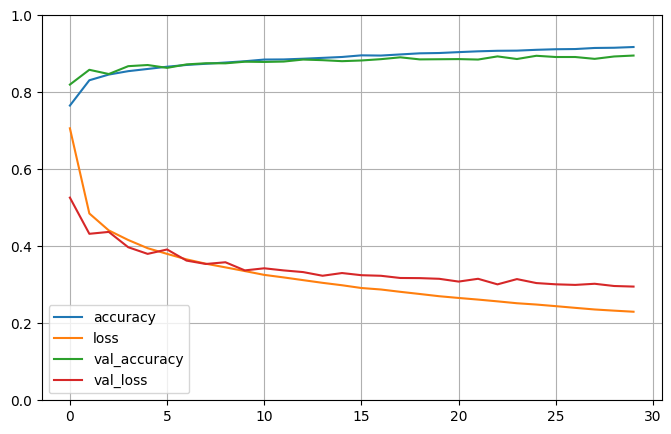

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Evaluation and Prediction

In [18]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.8470 - loss: 60.9781


[63.975860595703125, 0.8449000120162964]

In [20]:
X_new = X_test[:3]
# Probability of each class
y_prob = model.predict(X_new)
y_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
import numpy as np

# Prediction
y_pred = y_prob.argmax(axis=-1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')